In [1]:
import gzip
import pandas as pd
import json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/DSPM"

/content/drive/MyDrive/DSPM


In [4]:
import pandas as pd
import numpy as np
import re #regular expressions
# pip install -U spacy
# python -m spacy download en_core_web_sm
#pip install -U spacy && python -m spacy download en_core_web_sm
import spacy #natural language processing
import matplotlib.pyplot as plt
from nltk import tokenize # fast sentence tokenization
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [5]:
reviews = pd.read_json("top_prod_reviews.json",compression="gzip")
reviews.head()



,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc
2543,1,0,A1SJGHZDQHVYWH,B000142FVW,Julie D. Cassetina,Doesnt match the regular color of the real pro...,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2544,3,0,A1EZAX4P346ABG,B000142FVW,James C. James,Not pigmented enough. Needed three coats and s...,Low pigment,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2545,4,0,A1AT61K23ZY13Z,B000142FVW,Amazon Customer,I really liked the color of this polish. It wa...,I really liked the color of this polish,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2546,5,0,A326K7TN4PZE82,B000142FVW,DJ Curtiss,"Opi is the best quality polish I've used, and ...",Sturdy and Pretty Colors,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...
2547,1,0,AHHXLXF3I7BWW,B000142FVW,Angelica,Its counterfeit :/,One Star,['Nail lacquer is the original nail polish for...,,"OPI Nail Lacquer, Not So Bora-Bora-ing Pink, 0...","[B000NG90UM, B002D4GYHE, B00178VX50, B00R2X2S7...","26,115 in Beauty & Personal Care (","[B000NG801C, B004220DOU, B0035YFH6K, B006JUVPS...",$8.40,26115,'Nail lacquer is the original nail polish form...


In [6]:
prod2= reviews[reviews['asin']=="B0002ZW5UQ"]
prod2.head()

,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc
22116,5,9,A38YJ9GY4GVPT9,B0002ZW5UQ,ShaQ,"The top of my head is very thin, but with a fe...",The Solution!,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...
22117,5,3,A2MPCT53L41805,B0002ZW5UQ,Michael B. Kidder,I have been using Toppik for several years now...,My Toppik,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...
22118,1,35,A3OX1RJNGVILO,B0002ZW5UQ,Joe B. Gunn,Even with the spray made to make the fibers st...,No No No,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...
22119,5,3,A8QH8GQ4EPVN5,B0002ZW5UQ,L. Kay,I was told about your product from a client at...,Wonderful product,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...
22120,1,0,A166KBE86OFAQO,B0002ZW5UQ,Liz O&amp;amp;#39;,I am thinning at the temples due to postpartum...,So glad I only ordered the smallest size of this,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...


In [7]:
prod2 = prod2.reset_index(drop=True)

In [8]:
prod2['reviewText']= prod2['reviewText'].apply(lambda x: x.lower())

In [9]:
prod2.head(2)

,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc
0,5,9,A38YJ9GY4GVPT9,B0002ZW5UQ,ShaQ,"the top of my head is very thin, but with a fe...",The Solution!,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...
1,5,3,A2MPCT53L41805,B0002ZW5UQ,Michael B. Kidder,i have been using toppik for several years now...,My Toppik,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...


In [10]:
#Tokenize the Data
nlp = spacy.load("en_core_web_sm")
nlp.Defaults.stop_words.add("product")
nlp.Defaults.stop_words.add("products")
nlp.Defaults.stop_words.add("hair")
nlp.Defaults.stop_words.add("fiber")
nlp.Defaults.stop_words.add("fibers")
nlp.Defaults.stop_words.add("toppik")
nlp.Defaults.stop_words.add("thin")
nlp.Defaults.stop_words.add("head")
nlp.Defaults.stop_words.add("spray")

In [11]:
def remove_stopwords(text):
  '''
  Args

  text : a string of product review

  Return:

  tokens: a list of tokens without stopwords and punctutaions
  '''
  tokens=[]
  doc=nlp(text)
  for word in doc:
    if word.is_stop==False:
      if word.is_punct==False:
        if word.pos_=='ADJ' or word.pos_=="NOUN" or word.pos_=="VERB":
          tokens.append(word.text)
  sentence = " ".join(tokens)

  
  return sentence

In [12]:
prod2['reviewsTokens']=prod2['reviewText'].apply(lambda x: remove_stopwords(x))

In [13]:
prod2.head()

,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc,reviewsTokens
0,5,9,A38YJ9GY4GVPT9,B0002ZW5UQ,ShaQ,"the top of my head is very thin, but with a fe...",The Solution!,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,sprinkles tell went swimming place awesome
1,5,3,A2MPCT53L41805,B0002ZW5UQ,Michael B. Kidder,i have been using toppik for several years now...,My Toppik,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,years number works don'y mean vain helps disgu...
2,1,35,A3OX1RJNGVILO,B0002ZW5UQ,Joe B. Gunn,even with the spray made to make the fibers st...,No No No,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,stay place rub pillow night wake face brush pi...
3,5,3,A8QH8GQ4EPVN5,B0002ZW5UQ,L. Kay,i was told about your product from a client at...,Wonderful product,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,told client salon purchased looks great fuller...
4,1,0,A166KBE86OFAQO,B0002ZW5UQ,Liz O&amp;amp;#39;,i am thinning at the temples due to postpartum...,So glad I only ordered the smallest size of this,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,thinning temples postpartum loss glad ordered ...


In [14]:
#what are the top 10 most frequent words

#split_it = [item for items in prod1['reviewsTokens'] for item in items]
#len(split_it)

split_it = []
for i in prod2['reviewsTokens']:
    split_it+=i.split()

len(split_it)

45844

In [15]:

text_top_counter= Counter(split_it)
text_top= []
text_top_counts= []
for k, v in text_top_counter.most_common(10):
    text_top.append(k)
    text_top_counts.append(v)
print(text_top)

['use', 'thinning', 'works', 'great', 'scalp', 'look', 'good', 'color', 'love', 'looks']


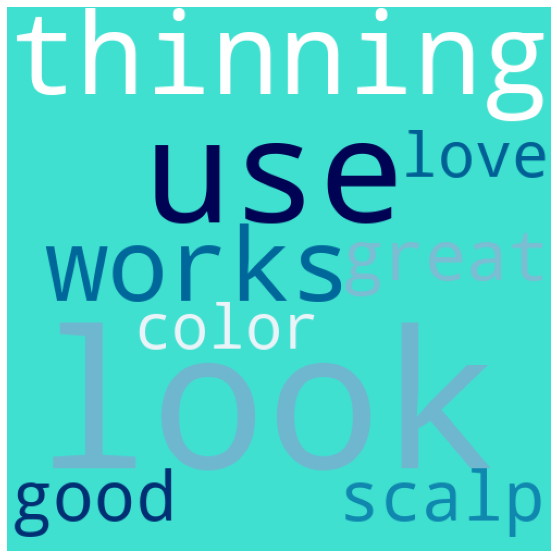

In [18]:
#Plot top 10 words
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plot_it = " ".join(text_top)
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(plot_it)
plot_cloud(wordcloud)

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     |████████████████████████████████| 133kB 5.8MB/s 


In [ ]:
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    #print("Overall sentiment dictionary is : ", sentiment_dict) 
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    #print("Sentence Overall Rated As", end = " ") 
    
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.0 :
      result = "Positive"
      #print("Positive") 
  
    elif sentiment_dict['compound'] <  0.0 : 
      result = "Negative"
      #print("Negative") 
  
    #else : 
      #result = "Neutral"
      #print("Neutral") 
    return result

In [ ]:
prod2.shape

(3455, 17)

In [ ]:
# add verdict
def result_token(df):
  lst=[]
  for i in df['reviewsTokens']:
    output = sentiment_scores(i)
    lst.append(output)
  df['Verdict'] = lst
  return df

In [ ]:
result_token(prod2)

,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc,reviewsTokens,Verdict
0,5,9,A38YJ9GY4GVPT9,B0002ZW5UQ,ShaQ,"the top of my head is very thin, but with a fe...",The Solution!,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,sprinkles tell went swimming place awesome,Positive
1,5,3,A2MPCT53L41805,B0002ZW5UQ,Michael B. Kidder,i have been using toppik for several years now...,My Toppik,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,years number works don'y mean vain helps disgu...,Negative
2,1,35,A3OX1RJNGVILO,B0002ZW5UQ,Joe B. Gunn,even with the spray made to make the fibers st...,No No No,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,stay place rub pillow night wake face brush pi...,Negative
3,5,3,A8QH8GQ4EPVN5,B0002ZW5UQ,L. Kay,i was told about your product from a client at...,Wonderful product,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,told client salon purchased looks great fuller...,Positive
4,1,0,A166KBE86OFAQO,B0002ZW5UQ,Liz O&amp;amp;#39;,i am thinning at the temples due to postpartum...,So glad I only ordered the smallest size of this,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,thinning temples postpartum loss glad ordered ...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,5,0,A1JBUAMAY4QRCA,B0002ZW5UQ,Mitchell G,works great . i recommend it,works great. I recommend,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,works great recommend,Positive
3451,2,0,AFQOVFMGQFC5R,B0002ZW5UQ,LFT,"this is a tiny sample size, which i knew, i ju...",Not for me,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,tiny sample size knew realize tiny think need ...,Positive
3452,1,0,ASA3J5DHT0D83,B0002ZW5UQ,KGS,maybe i need a tutorial but this stuff is very...,One Star,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,need tutorial stuff messy going,Negative
3453,4,0,A1QCMAQ9Y484MM,B0002ZW5UQ,Amazon Customer,"covers well, but sometime hard to put in",Four Stars,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B000

In [ ]:
prod2.head(2)

,overall,vote,reviewerID,asin,reviewerName,reviewText,summary,description,fit,title,also_buy,rank,also_view,price,rank_amazon,desc,reviewsTokens,Verdict
0,5,9,A38YJ9GY4GVPT9,B0002ZW5UQ,ShaQ,"the top of my head is very thin, but with a fe...",The Solution!,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,sprinkles tell went swimming place awesome,Positive
1,5,3,A2MPCT53L41805,B0002ZW5UQ,Michael B. Kidder,i have been using toppik for several years now...,My Toppik,['TOPPIK Hair Building Fibers instantly give y...,,TOPPIK Hair Building Fibers,"[B000QGKQXO, B0001Z66UM, B00I06DHCO, B00VT143H...","5,916 in Beauty &amp; Personal Care (","[B01GMR2FO8, B00Y865UBQ, B0001Z66UM, B00I06DHC...",$46.95,5916,'TOPPIK Hair Building Fibers instantly give yo...,years number works don'y mean vain helps disgu...,Negative


In [ ]:
#choose 3 columns only

prod2 = prod2[['overall','reviewText','Verdict']]
#prod2 = prod2.reset_index(drop=True)
prod2.head(2)


,overall,reviewText,Verdict
0,5,"the top of my head is very thin, but with a fe...",Positive
1,5,i have been using toppik for several years now...,Negative


In [ ]:

change_nums = {"Verdict":     {"Positive": 1, "Negative": 0},
                "overall": {1: 0, 2: 0, 3: 0, 4: 1,5: 1}}
prod2 = prod2.replace(change_nums)
prod2.rename(columns = {'overall': 'sentiment','Verdict':'prediction'}, inplace = True)
prod2.head()



,sentiment,reviewText,prediction
0,1,"the top of my head is very thin, but with a fe...",1
1,1,i have been using toppik for several years now...,0
2,0,even with the spray made to make the fibers st...,0
3,1,i was told about your product from a client at...,1
4,0,i am thinning at the temples due to postpartum...,0


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

Random Chances: ROC AUC=0.500
Product 2: ROC AUC= 0.629
Product 2: Accuracy= 0.795
Product 2: Precision= 0.827
Product 2: Recall= 0.929
Product 2: f1= 0.875


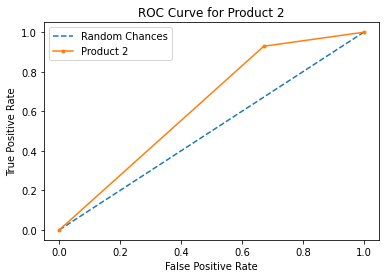

In [ ]:
# roc curve and auc

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(prod2['sentiment']))]

# calculate scores
ns_auc = roc_auc_score(prod2['sentiment'], ns_probs)
pro_1 = roc_auc_score(prod2['sentiment'], prod2['prediction'])
acc= accuracy_score(prod2['sentiment'],prod2['prediction'])
precision= precision_score(prod2['sentiment'],prod2['prediction'])
recall= recall_score(prod2['sentiment'],prod2['prediction'])
f1= f1_score(prod2['sentiment'],prod2['prediction'])


# summarize scores
print('Random Chances: ROC AUC=%.3f' % (ns_auc))
print('Product 2: ROC AUC= %.3f' % (pro_1))
print('Product 2: Accuracy= %.3f' % (acc))
print('Product 2: Precision= %.3f' % (precision))
print('Product 2: Recall= %.3f' % (recall))
print('Product 2: f1= %.3f' % (f1))



# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(prod2['sentiment'], ns_probs)
one_fpr, one_tpr, _ = roc_curve(prod2['sentiment'], prod2['prediction'])


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Chances')
pyplot.plot(one_fpr, one_tpr, marker='.', label='Product 2')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
pyplot.title("ROC Curve for Product 2")
# show the plot
pyplot.show()

In [ ]:
prod2['prediction'].value_counts().to_frame()

,prediction
1,3011
0,444


In [ ]:
output_file = open("Prod2.txt", "w")
output_file.write("{:.2f}\n".format(acc))
output_file.write("{:.2f}\n".format(precision))
output_file.write("{:.2f}\n".format(recall))
output_file.write("{:.2f}".format(f1))
output_file.close()

In [ ]:
prod2.to_json('prod2_Vader_predictions.json',compression='gzip')